In [30]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [61]:
data_set = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_5358347.csv', on_bad_lines='skip')
data_set.head(2)
#Values here represent co2 emission in kilo-tonnes unit

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,304354.882669,298735.435602,295090.0,303600.0,312160.0,327430.0,...,529639.997445,521760.009862,543439.999305,565430.012964,587699.992426,574029.994987,578510.015696,587509.992346,590040.005282,603030.016154


In [32]:
data_set.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')

In [246]:
lables=['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018','2019']

data_final = data_set[data_set['Country Name']=='China']
data_final_2=data_final

In [247]:
data_final.drop('Country Code', axis=1, inplace=True)
data_final.drop('Indicator Code', axis=1, inplace=True)
data_final.drop('Indicator Name', axis=1, inplace=True)

data_final.rename(columns={'Country Name':'years'}, inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_44700\4267781669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop('Country Code', axis=1, inplace=True)
C:\Users\Tony\AppData\Local\Temp\ipykernel_44700\4267781669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop('Indicator Code', axis=1, inplace=True)
C:\Users\Tony\AppData\Local\Temp\ipykernel_44700\4267781669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [255]:
China_emis=data_final.transpose()
China_emis.to_csv('China_emis.csv')

In [256]:
dg=pd.read_csv('China_emis.csv', header=1)
dg = dg.rename(columns={'China':'Emission  in KTs'})

In [257]:
import os 
os.remove('China_emis.csv')
dg.to_csv('China_emis.csv')

In [258]:
#similarly do it for india to find indian emission in KT

#Find the graphical representation of percentage increase

In [197]:
array1=np.array(data_final_2)

In [198]:
l=[]

for i in range(5,array1.size):
    l.append(round((array1[0][i]-array1[0][i-1])*100/array1[0][i-1],2))
    
min(l) #we know this value may change in other countries so lets plot with extended limits

-2.55

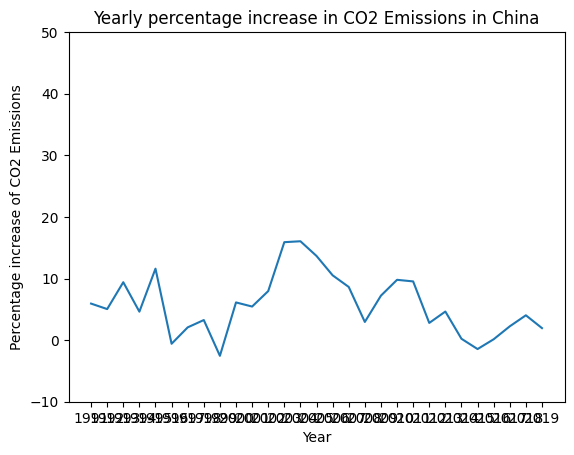

In [37]:
plt.plot(lables, l)
plt.title("Yearly percentage increase in CO2 Emissions in China")
plt.ylim(-10, 50)
plt.xlabel("Year")
plt.ylabel("Percentage increase of CO2 Emissions")
plt.show()